In [1]:
import math
import meep as mp
from meep import mpb

Using MPI version 4.0, 1 processes


/home/gridsan/mcomella/.conda/envs/pmp/lib/python3.11/site-packages/numpy/core/getlimits.py:500: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/home/gridsan/mcomella/.conda/envs/pmp/lib/python3.11/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  return self._float_to_str(self.smallest_subnormal)
/home/gridsan/mcomella/.conda/envs/pmp/lib/python3.11/site-packages/numpy/core/getlimits.py:500: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/home/gridsan/mcomella/.conda/envs/pmp/lib/python3.11/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  return self._float_to_str(self.smallest_subnormal)


In [2]:
num_bands = 8

a = 1.2

k_points = [mp.Vector3(),          # Gamma
            mp.Vector3(0.6),       # X
            mp.Vector3(0.6, 0.6),  # M
            mp.Vector3()]          # Gamma

k_points = mp.interpolate(8, k_points)

mat = mp.Medium(epsilon=12)
geometry = [mp.Block(size=mp.Vector3(0.6, 0.6, 0.2), material=mat)]
geometry_lattice = mp.Lattice(size=mp.Vector3(a, a))
resolution = 32

ms = mpb.ModeSolver(num_bands=num_bands,
                    k_points=k_points,
                    geometry=geometry,
                    geometry_lattice=geometry_lattice,
                    resolution=resolution)

In [3]:
ms.run_te()
te_bands = ms.all_freqs

ms.run_tm()
tm_bands = ms.all_freqs

# Pickle the data
import pickle
with open('mpb-test.pkl', 'wb') as f:
    pickle.dump([te_bands, tm_bands], f)

Initializing eigensolver data
Computing 8 bands with 1e-07 tolerance
Working in 2 dimensions.
Grid size is 40 x 40 x 1.
Solving for 8 bands at a time.
Creating Maxwell data...
Mesh size is 3.
Lattice vectors:
     (1.2, 0, 0)
     (0, 1.2, 0)
     (0, 0, 1)
Cell volume = 1.44
Reciprocal lattice vectors (/ 2 pi):
     (0.833333, -0, 0)
     (-0, 0.833333, -0)
     (0, -0, 1)
Geometric objects:
     block, center = (0,0,0)
          size (0.6,0.6,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
Geometric object tree has depth 1 and 1 object nodes (vs. 1 actual objects)
Initializing epsilon function...
Allocating fields...
Solving for band polarization: te.
Initializing fields to random numbers...
28 k-points
  Vector3<0.0, 0.0, 0.0>
  Vector3<0.06666666666666667, 0.0, 0.0>
  Vector3<0.13333333333333333, 0.0, 0.0>
  Vector3<0.2, 0.0, 0.0>
  Vector3<0.26666666666666666, 0.0, 0.0>
  Vector3<0.3333333333333333, 0.0, 0.0>
  Vector3<0.4, 0.0, 0.0>
  Vector3<0.4666666666666667, 0.0, 0.0>
  Vector3

In [4]:
# Load pickled data
with open('mpb-test.pkl', 'rb') as f:
    te_bands, tm_bands = pickle.load(f)

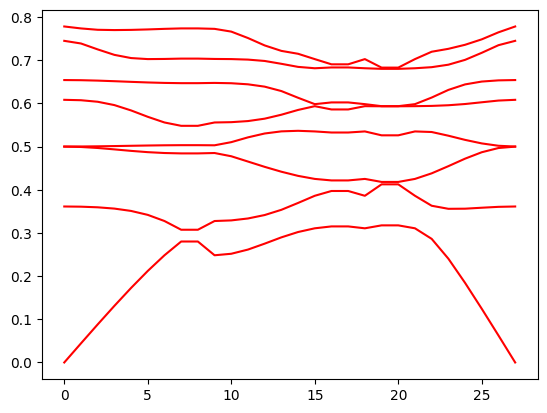

In [5]:
import matplotlib.pyplot as plt

for i in range(num_bands):
    te_band = [b[i] for b in te_bands]
    tm_band = [b[i] for b in tm_bands]
    plt.plot(te_band, 'r')
    # plt.plot(tm_band, 'b')

epsilon: 1-12, mean 3.75, harm. mean 1.33129, 27.5625% > 1, 25% "fill"
real part range: 1 .. 12


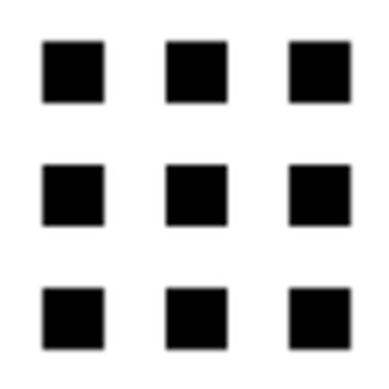

In [6]:
md = mpb.MPBData(rectify=True, periods=3, resolution=32)
eps = ms.get_epsilon()
converted_eps = md.convert(eps)

plt.imshow(converted_eps.T, interpolation='spline36', cmap='binary')
plt.axis('off')
plt.show()

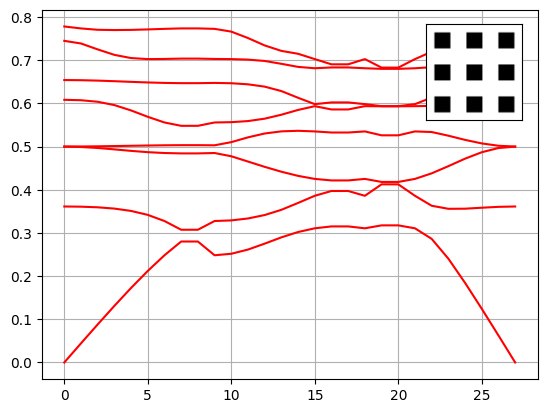

In [7]:
fig, ax1 = plt.subplots()

left, bottom, width, height = [0.7, 0.65, 0.2, 0.2]
ax2 = fig.add_axes([left, bottom, width, height])


for i in range(num_bands):
    te_band = [b[i] for b in te_bands]
    tm_band = [b[i] for b in tm_bands]
    ax1.plot(te_band, 'r')

ax2.imshow(converted_eps.T, interpolation='spline36', cmap='binary')
plt.xticks([])
plt.yticks([])
ax1.grid()

/tmp/ipykernel_60032/1933201872.py:6: RuntimeWarning: divide by zero encountered in divide
  plt.plot(a/np.array(te_band), 'r')
/tmp/ipykernel_60032/1933201872.py:7: RuntimeWarning: divide by zero encountered in divide
  plt.plot(a/np.array(tm_band), 'b')


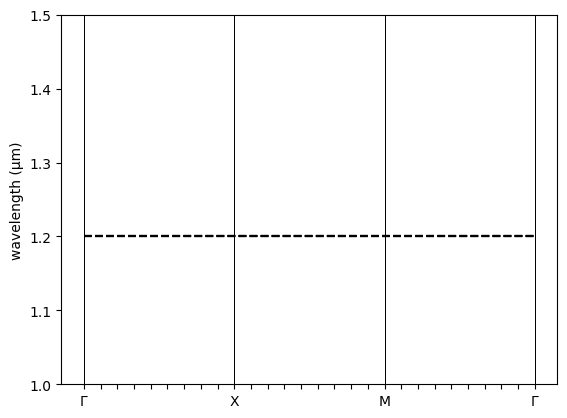

In [8]:
import numpy as np

for i in range(num_bands):
    te_band = [b[i] for b in te_bands]
    tm_band = [b[i] for b in tm_bands]
    plt.plot(a/np.array(te_band), 'r')
    plt.plot(a/np.array(tm_band), 'b')
    plt.ylim(1, 1.5)
    plt.ylabel('wavelength (μm)')
    ticks = ['']*len(k_points)
    ticks[0] = 'Γ'
    ticks[9] = 'X'
    ticks[18] = 'M'
    ticks[27] = 'Γ'
    plt.xticks(range(len(k_points)), ticks)
    plt.vlines([0, 9, 18, 27], 1, 2, colors='k', linewidth=0.5)
    plt.hlines(1.2, 0, 27, linestyles='dashed', colors='k', alpha=.5)